In [2]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library('tidyverse')
quiet_library("hise")
quiet_library('ArchR')
quiet_library('data.table')
quiet_library('jsonlite')
quiet_library('parallel')
quiet_library("Seurat")
quiet_library(H5weaver)
#remotes::install_version("Matrix", version = "1.6-1.1")


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [1]:
remotes::install_version("Matrix", version = "1.6-1.1")


Installing package into ‘/home/jupyter/libb’
(as ‘lib’ is unspecified)



In [31]:
remotes::install_version("ggplot2", version = "3.4.0")

Installing package into ‘/home/jupyter/libb’
(as ‘lib’ is unspecified)



In [2]:
addArchRGenome("hg38")
addArchRThreads(threads = 60)

Setting default genome to Hg38.

Setting default number of Parallel threads to 60.



In [82]:
meta<-read.csv('meta_data_GEO.csv')

In [ ]:
mclapply(meta$combined_sample_id,function(i){
ArrowFiles <- createArrowFiles(
  inputFiles = paste0(i,'_fragments.tsv.gz'),
  sampleNames = i,
  minTSS = 4, #Dont set this too high because you can always increase later
  minFrags = 1000, 
  addTileMat = TRUE,
  addGeneScoreMat = TRUE
)

},mc.cores=16)

In [5]:
doubScores <- addDoubletScores(
    input = paste0(meta$combined_sample_id,'.arrow'),
    k = 10, #Refers to how many cells near a "pseudo-doublet" to count.
    knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search with doublet projection.
    LSIMethod = 1
)

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-1acd02c9176b5-Date-2024-03-31_Time-04-26-30.398954.log
If there is an issue, please report to github with logFile!

2024-03-31 04:26:30.44228 : Batch Execution w/ safelapply!, 0 mins elapsed.

2024-03-31 04:26:30.447462 : GSM6611363_B065-P1_PB00593-04 (1 of 16) :  Computing Doublet Statistics, 0 mins elapsed.



In [7]:
projHeme1 <- ArchRProject(
  ArrowFiles = paste0(meta$combined_sample_id,'.arrow'), 
  outputDirectory = "PenSen_ATAC",
  copyArrows = TRUE #This is recommened so that if you modify the Arrow files you have an original copy for later usage.
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Copying ArrowFiles to Ouptut Directory! If you want to save disk space set copyArrows = FALSE

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 


Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /_

In [11]:
saveArchRProject(ArchRProj = projHeme2, outputDirectory = "PenSen_ATAC", load = TRUE)


Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC 
samples(16): GSM6611363_B065-P1_PB00593-04
  GSM6611364_B069-P1_PB00323-02 ... GSM6611377_B065-P1_PB00192-02
  GSM6611378_B065-P1_PB00197-02
sampleColData names(1): ArrowFiles
cellColData names(13): Sample TSSEnrichment ... nDiFrags BlacklistRatio
numberOfCells(1): 327657
medianTSS(1): 25.347
medianFrags(1): 6942

In [8]:
as.data.frame(projHeme1@cellColData)

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,nDiFrags,BlacklistRatio
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM6611363_B065-P1_PB00593-04#27c3caece40911eb903842010a19c839,GSM6611363_B065-P1_PB00593-04,6.292,17880,23311,1383,0.1274382,1,1.3124573,25368,39551,91460,26541,0.007560682
GSM6611363_B065-P1_PB00593-04#e458cf40e40911eb8d8342010a19c839,GSM6611363_B065-P1_PB00593-04,11.801,18373,20319,889,0.1955517,1,1.0892347,11909,24867,51953,15177,0.008555810
GSM6611363_B065-P1_PB00593-04#b6dcdeeee40911ebb24842010a19c839,GSM6611363_B065-P1_PB00593-04,20.910,31922,29712,592,0.4479556,1,0.9987946,7560,16592,33164,9012,0.008925341
GSM6611363_B065-P1_PB00593-04#3c68de24e40911eb9cd142010a19c839,GSM6611363_B065-P1_PB00593-04,18.856,22444,20997,484,0.3380506,1,1.2045858,6451,14087,31056,10518,0.007792375
GSM6611363_B065-P1_PB00593-04#7999e25ce40911eb818b42010a19c839,GSM6611363_B065-P1_PB00593-04,23.027,31828,29031,532,0.4693016,1,0.9104385,6950,16190,30930,7790,0.008600065
GSM6611363_B065-P1_PB00593-04#7536518ce40911eb818b42010a19c839,GSM6611363_B065-P1_PB00593-04,24.544,30342,29125,462,0.5095346,1,0.8409018,6252,15525,28580,6803,0.008082575
GSM6611363_B065-P1_PB00593-04#d1346762e40911eb891842010a19c839,GSM6611363_B065-P1_PB00593-04,19.669,24991,23652,415,0.4205847,1,0.8837007,5750,14927,28118,7441,0.007379614
GSM6611363_B065-P1_PB00593-04#b38889a0e40911ebb24842010a19c839,GSM6611363_B065-P1_PB00593-04,23.901,28980,26985,450,0.4890536,1,0.7927741,5494,15389,27589,6706,0.008155424
GSM6611363_B065-P1_PB00593-04#76d43036e40911eb818b42010a19c839,GSM6611363_B065-P1_PB00593-04,21.380,26129,23783,373,0.4377347,1,0.8582666,5690,14619,27166,6857,0.006865199


1 


Picking joint bandwidth of 0.545



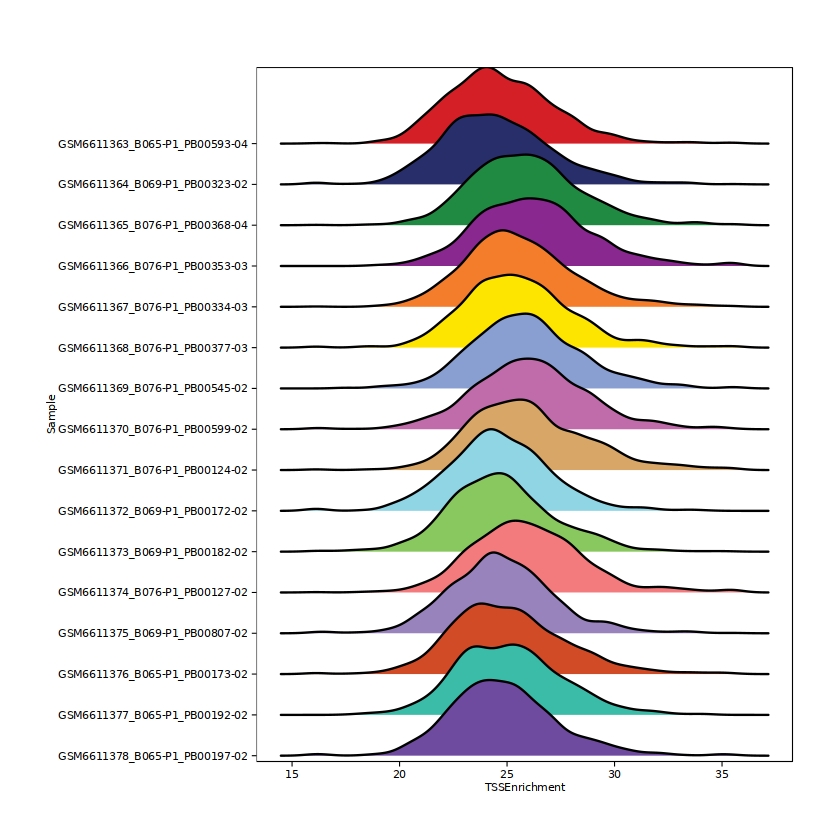

In [10]:
plotGroups(
    ArchRProj = projHeme1, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "TSSEnrichment",
    plotAs = "ridges"
   )


ArchR logging to : ArchRLogs/ArchR-plotFragmentSizes-1acd01eeb5f10-Date-2024-03-31_Time-04-28-32.265976.log
If there is an issue, please report to github with logFile!

ArchR logging successful to : ArchRLogs/ArchR-plotFragmentSizes-1acd01eeb5f10-Date-2024-03-31_Time-04-28-32.265976.log



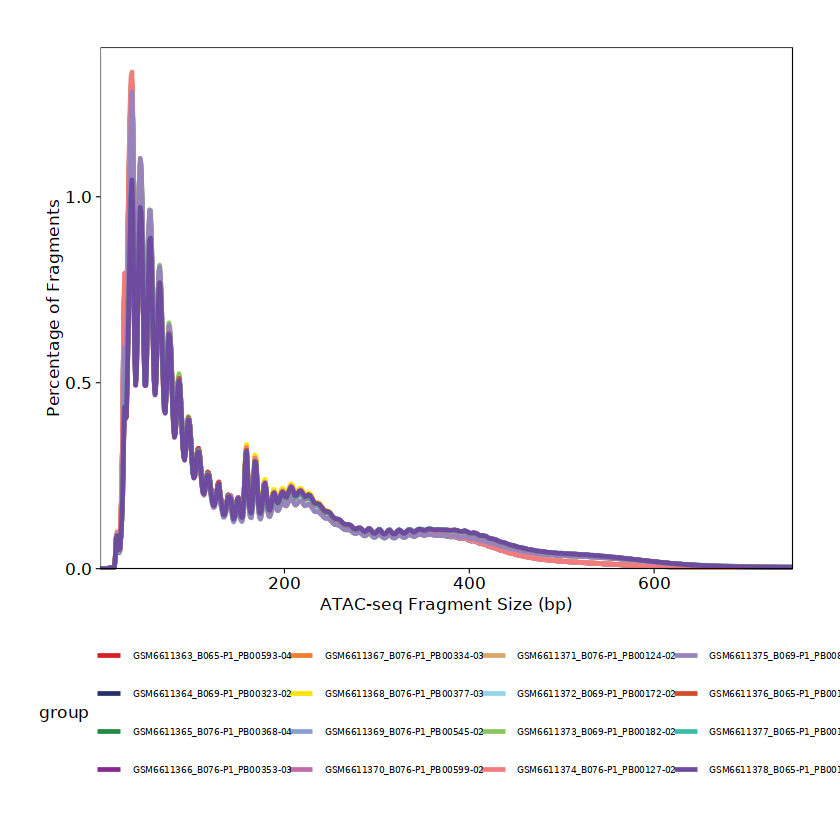

In [11]:
 plotFragmentSizes(ArchRProj = projHeme1)


Installing package into ‘/home/jupyter/libb’
(as ‘lib’ is unspecified)



In [10]:
projHeme2 <- addIterativeLSI(
    ArchRProj = projHeme1,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 2, 
    clusterParams = list(
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 75000, 
    dimsToUse = 1:30
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-1c2c25a64e70b-Date-2024-03-31_Time-18-18-31.97492.log
If there is an issue, please report to github with logFile!

2024-03-31 18:18:32.881157 : Computing Total Across All Features, 0.011 mins elapsed.

2024-03-31 18:18:40.026698 : Computing Top Features, 0.13 mins elapsed.

###########
2024-03-31 18:18:41.808444 : Running LSI (1 of 2) on Top Features, 0.159 mins elapsed.
###########

2024-03-31 18:18:42.060036 : Sampling Cells (N = 10010) for Estimated LSI, 0.164 mins elapsed.

2024-03-31 18:18:42.063613 : Creating Sampled Partial Matrix, 0.164 mins elapsed.

2024-03-31 18:18:58.168583 : Computing Estimated LSI (projectAll = FALSE), 0.432 mins elapsed.

2024-03-31 18:20:55.703729 : Identifying Clusters, 2.391 mins elapsed.

2024-03-31 18:21:10.677563 : Identified 3 Clusters, 2.641 mins elapsed.

2024-03-31 18:21:10.695266 : Saving LSI Iteration, 2.641 mins elapsed.




************************************************************
2024-03-31 18:21:18.570466 : ERROR Found in .saveIteration for  
LogFile = ArchRLogs/ArchR-addIterativeLSI-1c2c25a64e70b-Date-2024-03-31_Time-18-18-31.97492.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2024-03-31 18:21:18.573465 : Creating Cluster Matrix on the total Group Features, 2.772 mins elapsed.

2024-03-31 18:21:30.092951 : Computing Variable Features, 2.964 mins elapsed.

###########
2024-03-31 18:21:30.22317 : Running LSI (2 of 2) on Variable Features, 2.966 mins elapsed.
###########

2024-03-31 18:21:30.36258 : Creating Partial Matrix, 2.969 mins elapsed.

2024-03-31 18:25:21.556484 : Computing LSI, 6.822 mins elapsed.

2024-03-31 18:35:24.528851 : Finished Running IterativeLSI, 16.872 mins elapsed.



In [12]:
saveArchRProject(ArchRProj = projHeme2, outputDirectory = "PenSen_ATAC", load = TRUE)


Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC 
samples(16): GSM6611363_B065-P1_PB00593-04
  GSM6611364_B069-P1_PB00323-02 ... GSM6611377_B065-P1_PB00192-02
  GSM6611378_B065-P1_PB00197-02
sampleColData names(1): ArrowFiles
cellColData names(13): Sample TSSEnrichment ... nDiFrags BlacklistRatio
numberOfCells(1): 327657
medianTSS(1): 25.347
medianFrags(1): 6942

In [3]:
projHeme2 <- loadArchRProject(path = 'PenSen_ATAC/')


Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
getAvailableMatrices(ArchRProj = projHeme2)


[1] "GeneScoreMatrix" "MotifMatrix"     "PeakMatrix"      "TileMatrix"

In [77]:
scRNA_labels<-read.csv('PedSenior_TEAseq_Labels_2024-03-26.csv')
scRNA_labels$real_barcodes<-paste0(scRNA_labels$well_id,'-',scRNA_labels$original_barcodes,'-1')

In [78]:
scATAC_labels<-as.data.frame(projHeme2@cellColData)
scATAC_labels$barcodes <- str_extract(rownames(scATAC_labels), "(?<=#).*$")

In [83]:
scATAC_meta_data_files<-paste0(meta$combined_sample_id,'_filtered_metadata.csv.gz')

In [84]:
meta_data_list_ATAC<-mclapply(scATAC_meta_data_files,function(x){


metadata <- read.csv(gzfile(x))
return(metadata)

},mc.cores=16)

In [85]:
meta_data_ATAC<-do.call(rbind,meta_data_list_ATAC)

In [86]:
scATAC_labels<-left_join(scATAC_labels,meta_data_ATAC,by=('barcodes'))

In [87]:
scATAC_labels$real_barcodes<-paste0(gsub('-A','-',scATAC_labels$well_id),'-',scATAC_labels$original_barcodes)

In [88]:
scATAC_labels<-left_join(scATAC_labels,scRNA_labels,by=c('real_barcodes'))

In [89]:
scATAC_labels<-scATAC_labels %>% filter(predicted_doublet=="False",pct_counts_mito<15,n_genes>200,n_genes<2500)

In [90]:
projHeme2@cellColData$barcodes<-str_extract(rownames(as.data.frame(projHeme2@cellColData)), "(?<=#).*$")

In [91]:
scATAC_labels$ATAC_barcodes<-paste0(scATAC_labels$Sample,'#',scATAC_labels$barcodes.x)

In [95]:
write.csv(scATAC_labels,'scATAC_cell_meta_data.csv')

In [ ]:
projHeme3<-projHeme2[scATAC_labels$ATAC_barcodes,]

In [ ]:
projHeme3@cellColData$celltype<-scATAC_labels$AIFI_L3


In [21]:
saveArchRProject(ArchRProj = projHeme3, outputDirectory = "PenSen_ATAC", load = TRUE)


Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC 
samples(16): GSM6611363_B065-P1_PB00593-04
  GSM6611364_B069-P1_PB00323-02 ... GSM6611377_B065-P1_PB00192-02
  GSM6611378_B065-P1_PB00197-02
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... barcodes celltype
numberOfCells(1): 301210
medianTSS(1): 25.372
medianFrags(1): 6894

In [1]:
projHeme3 <- loadArchRProject(path = 'PenSen_ATAC/')


ERROR: Error in loadArchRProject(path = "PenSen_ATAC/"): could not find function "loadArchRProject"


In [8]:
options(future.globals.maxSize = 1000 * 1024^5)

In [26]:
projHeme3 <- addGroupCoverages(ArchRProj = projHeme3, groupBy = "celltype", maxReplicates = 16, maxCells = 2000, threads = 10 )


ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-20a9d3655b551-Date-2024-03-31_Time-22-20-42.22489.log
If there is an issue, please report to github with logFile!

Adaptive NK cell (1 of 57) : CellGroups N = 2

CD4 MAIT (2 of 57) : CellGroups N = 2

CD8 MAIT (3 of 57) : CellGroups N = 16

CD8aa (4 of 57) : CellGroups N = 9

CD27- effector B cell (5 of 57) : CellGroups N = 2

CD56bright NK cell (6 of 57) : CellGroups N = 2

CD95 memory B cell (7 of 57) : CellGroups N = 2

CM CD4 T cell (8 of 57) : CellGroups N = 16

CM CD8 T cell (9 of 57) : CellGroups N = 15

Core CD14 monocyte (10 of 57) : CellGroups N = 2

Core CD16 monocyte (11 of 57) : CellGroups N = 2

Core memory B cell (12 of 57) : CellGroups N = 2

Core naive B cell (13 of 57) : CellGroups N = 7

Core naive CD4 T cell (14 of 57) : CellGroups N = 16

Core naive CD8 T cell (15 of 57) : CellGroups N = 16

DN T cell (16 of 57) : CellGroups N = 13

Erythrocyte (17 of 57) : CellGroups N = 2

GZMB- CD27- EM CD4 T cell (18 of 57) :

In [1]:
projHeme3 <- loadArchRProject(path = 'PenSen_ATAC/')


ERROR: Error in loadArchRProject(path = "PenSen_ATAC/"): could not find function "loadArchRProject"


In [6]:
pathToMacs2<-'/opt/conda/bin/macs3'

In [7]:

projHeme3 <- addReproduciblePeakSet(
                        ArchRProj = projHeme3, 
                        groupBy = "celltype", 
                        pathToMacs2 = pathToMacs2, force = TRUE
                            )

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-2627a70df2021-Date-2024-04-01_Time-02-11-36.799295.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2024-04-01 02:11:38.16658 : Peak Calling Parameters!, 0.023 mins elapsed.



                                                                    Group
Adaptive NK cell                                         Adaptive NK cell
CD4 MAIT                                                         CD4 MAIT
CD8 MAIT                                                         CD8 MAIT
CD8aa                                                               CD8aa
CD27- effector B cell                               CD27- effector B cell
CD56bright NK cell                                     CD56bright NK cell
CD95 memory B cell                                     CD95 memory B cell
CM CD4 T cell                                               CM CD4 T cell
CM CD8 T cell                                               CM CD8 T cell
Core CD14 monocyte                                     Core CD14 monocyte
Core CD16 monocyte                                     Core CD16 monocyte
Core memory B cell                                     Core memory B cell
Core naive B cell                     

2024-04-01 02:11:38.17958 : Batching Peak Calls!, 0.023 mins elapsed.

2024-04-01 02:11:38.188644 : Batch Execution w/ safelapply!, 0 mins elapsed.

2024-04-01 02:17:08.986385 : Identifying Reproducible Peaks!, 5.536 mins elapsed.

2024-04-01 02:17:38.218328 : Creating Union Peak Set!, 6.024 mins elapsed.

Converged after 13 iterations!

Plotting Ggplot!

2024-04-01 02:17:51.366526 : Finished Creating Union Peak Set (203896)!, 6.243 mins elapsed.



In [8]:
saveArchRProject(ArchRProj = projHeme3, outputDirectory = "PenSen_ATAC", load = TRUE)


Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC 
samples(16): GSM6611363_B065-P1_PB00593-04
  GSM6611364_B069-P1_PB00323-02 ... GSM6611377_B065-P1_PB00192-02
  GSM6611378_B065-P1_PB00197-02
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... barcodes celltype
numberOfCells(1): 301210
medianTSS(1): 25.372
medianFrags(1): 6894

In [7]:
projHeme3 <- addPeakMatrix(projHeme3, force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-2b3a357301280-Date-2024-04-01_Time-03-26-08.887715.log
If there is an issue, please report to github with logFile!

2024-04-01 03:26:10.169281 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-2b3a357301280-Date-2024-04-01_Time-03-26-08.887715.log



In [8]:
#projHeme3 <- addHarmony(projHeme3, reducedDims = 'IterativeLSI', groupBy = c('batch_id'), force = TRUE)
     
projHeme3 <- addUMAP(
    ArchRProj = projHeme3, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine"
)

03:34:43 UMAP embedding parameters a = 0.583 b = 1.334

03:34:43 Read 301210 rows and found 30 numeric columns

03:34:43 Using Annoy for neighbor search, n_neighbors = 30

03:34:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:35:46 Writing NN index file to temp file /tmp/RtmpHf4RbA/file2b3a32d293b78

03:35:47 Searching Annoy index using 32 threads, search_k = 3000

03:36:02 Annoy recall = 100%

03:36:04 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 30

03:36:29 Initializing from normalized Laplacian + noise (using irlba)

03:37:38 Commencing optimization for 200 epochs, with 13671948 positive edges

03:43:00 Optimization finished

03:43:00 Creating temp model dir /tmp/RtmpHf4RbA/dir2b3a372996883

03:43:00 Creating dir /tmp

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-e2126b2bd12-Date-2024-04-02_Time-16-43-11.008419.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-e2126b2bd12-Date-2024-04-02_Time-16-43-11.008419.log



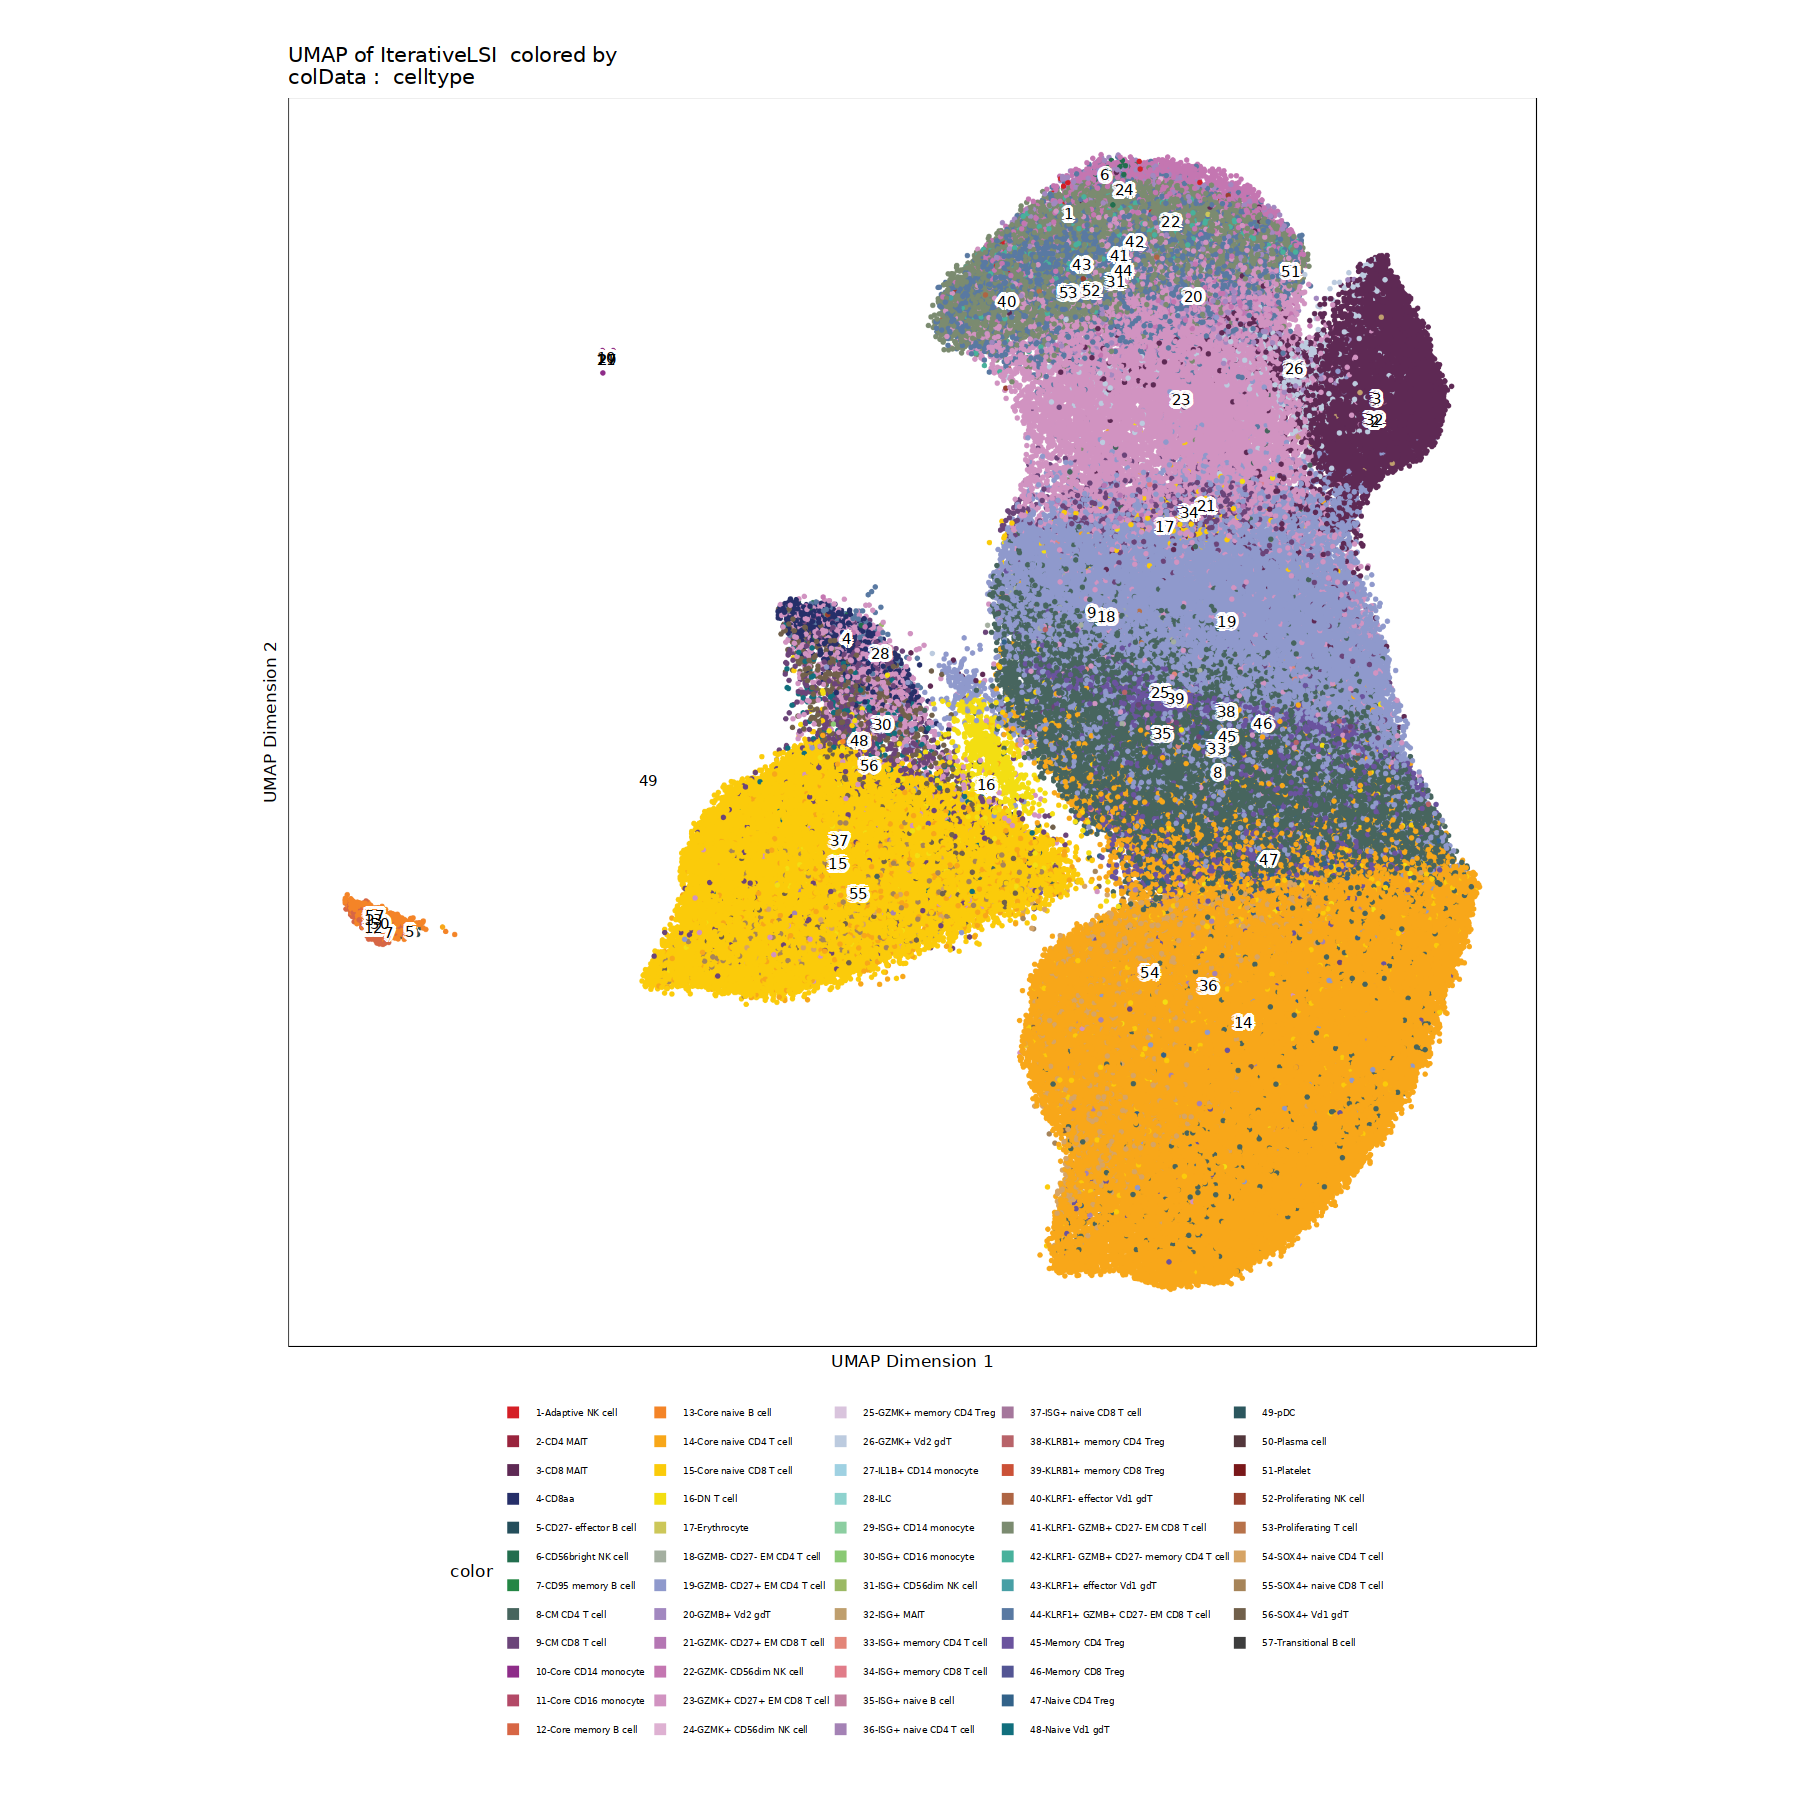

In [62]:
options(repr.plot.width = 15, repr.plot.height = 15)
plotEmbedding(ArchRProj = projHeme3, colorBy = "cellColData", name = "celltype", embedding = "UMAP")


In [10]:
saveArchRProject(ArchRProj = projHeme3, outputDirectory = "PenSen_ATAC", load = TRUE)


Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC 
samples(16): GSM6611363_B065-P1_PB00593-04
  GSM6611364_B069-P1_PB00323-02 ... GSM6611377_B065-P1_PB00192-02
  GSM6611378_B065-P1_PB00197-02
sampleColData names(1): ArrowFiles
cellColData names(17): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 301210
medianTSS(1): 25.372
medianFrags(1): 6894

In [ ]:
projHeme3$

In [ ]:
markersPeaks <- getMarkerFeatures(
    ArchRProj = projHeme3, 
    useMatrix = "PeakMatrix", 
    groupBy = "celltype",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon",
    maxCells = 10000
)


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-2627ac943-Date-2024-04-01_Time-02-30-52.373521.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2024-04-01 02:30:52.686135 : Matching Known Biases, 0.005 mins elapsed.

Found less than 100 cells for background matching, Lowering k to 11

2024-04-01 02:33:20.045133 : 

Found less than 100 cells for background matching, Lowering k to 0

2024-04-01 02:33:21.518159 : 



In [ ]:
saveArchRProject(ArchRProj = projHeme3, outputDirectory = "PenSen_ATAC", load = TRUE)


# Motif 

In [14]:
BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'JASPAR2020'

Old packages: 'bayestestR', 'bookdown', 'bslib', 'callr', 'data.table',
  'datawizard', 'DBI', 'dbplyr', 'DT', 'ggfun', 'ggplot2', 'ggsci', 'glmmTMB',
  'htmltools', 'httpuv', 'insight', 'kableExtra', 'lme4', 'Matrix', 'metR',
  'modelbased', 'parameters', 'performance', 'pkgbuild', 'processx',
  'RcppArmadillo', 'RSQLite', 'sass', 'see', 'shiny', 'tinytex', 'V8', 'xfun',
  'yulab.utils', 'BH', 'boot', 'brew', 'brio', 'Cairo', 'checkmate',
  'circlize', 'cli', 'clue', 'cluster', 'clustermq', 'coda', 'codetools',
  'commonmark', 'copula', 'covr', 'cowplot', 'cpp11', 'crosstalk', 'curl',
  'deldir', 'densityClust', 'DEoptimR', 'desc', 'deSolve', 'digest', 'diptest',
  'doBy', 'dotCall64', 'd

In [16]:
library(BSgenome.Hsapiens.UCSC.hg38)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:plyr’:

    compact


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:grid’:

    pattern


The following object is masked from ‘package:base’:

    strsplit


Loading required package: BiocIO

Loading required package: rtracklayer


Attaching package: ‘rtracklayer’


The following object is masked from ‘package:BiocIO’:

    FileForFormat




In [34]:
BiocManager::install("JASPAR2018")


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'JASPAR2018'

Old packages: 'bayestestR', 'bookdown', 'bslib', 'callr', 'data.table',
  'datawizard', 'DBI', 'dbplyr', 'DT', 'ggfun', 'ggplot2', 'ggsci', 'glmmTMB',
  'htmltools', 'httpuv', 'insight', 'kableExtra', 'lme4', 'Matrix', 'metR',
  'modelbased', 'parameters', 'performance', 'pkgbuild', 'processx',
  'RcppArmadillo', 'RSQLite', 'sass', 'see', 'shiny', 'tinytex', 'V8', 'xfun',
  'yulab.utils', 'BH', 'boot', 'brew', 'brio', 'Cairo', 'checkmate',
  'circlize', 'cli', 'clue', 'cluster', 'clustermq', 'coda', 'codetools',
  'commonmark', 'copula', 'covr', 'cowplot', 'cpp11', 'crosstalk', 'curl',
  'deldir', 'densityClust', 'DEoptimR', 'desc', 'deSolve', 'digest', 'diptest',
  'doBy', 'dotCall64', 'd

In [17]:
library(TFBSTools)


Attaching package: ‘TFBSTools’


The following object is masked from ‘package:Matrix’:

    Matrix




In [54]:
PWM <- TFBSTools::getMatrixSet(
x = JASPAR2020,
opts = list(collection = "CORE", species="9606", all_versions = FALSE, matrixtype="PWM")
)

In [55]:
PWM

PWMatrixList of length 633
names(633): MA0030.1 MA0031.1 MA0051.1 MA0057.1 ... MA0748.2 MA0528.2 MA0609.2

In [18]:
projHeme3 <- addMotifAnnotations(ArchRProj = projHeme3, motifSet = "cisbp", name = "cisbp", force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-401328d9cac-Date-2024-04-01_Time-16-11-15.269786.log
If there is an issue, please report to github with logFile!

2024-04-01 16:11:15.312325 : Gettting Motif Set, Species : Homo sapiens, 0.001 mins elapsed.

Using version 2 motifs!

2024-04-01 16:11:17.489743 : Finding Motif Positions with motifmatchr!, 0.037 mins elapsed.

2024-04-01 16:16:03.659551 : All Motifs Overlap at least 1 peak!, 4.806 mins elapsed.

2024-04-01 16:16:03.661944 : Creating Motif Overlap Matrix, 4.806 mins elapsed.

2024-04-01 16:16:06.631345 : Finished Getting Motif Info!, 4.856 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-401328d9cac-Date-2024-04-01_Time-16-11-15.269786.log



In [22]:
remotes::install_version("Matrix", version = "1.6.4")


Installing package into ‘/home/jupyter/libb’
(as ‘lib’ is unspecified)



In [ ]:
projHeme3 <- loadArchRProject(path = 'PenSen_ATAC/')

In [4]:
projHeme3 <- addBgdPeaks(projHeme3,force = TRUE)

Identifying Background Peaks!



In [6]:
projHeme3 <- addDeviationsMatrix(
  ArchRProj = projHeme3, 
  peakAnnotation = "Motif",
  force = TRUE,threads=50
)


Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-e214321c977-Date-2024-04-01_Time-16-43-42.091987.log
If there is an issue, please report to github with logFile!



NULL


2024-04-01 16:43:49.721642 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2024-04-01 18:44:22.783304 : Completed Computing Deviations!, 120.678 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-e214321c977-Date-2024-04-01_Time-16-43-42.091987.log



In [7]:
projHeme3@


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC 
samples(16): GSM6611363_B065-P1_PB00593-04
  GSM6611364_B069-P1_PB00323-02 ... GSM6611377_B065-P1_PB00192-02
  GSM6611378_B065-P1_PB00197-02
sampleColData names(1): ArrowFiles
cellColData names(17): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 301210
medianTSS(1): 25.372
medianFrags(1): 6894

In [ ]:
projHeme3 <- addImputeWeights(projHeme3)


GRanges object with 203896 ranges and 13 metadata columns:
                                   seqnames              ranges strand |
                                      <Rle>           <IRanges>  <Rle> |
         GZMB- CD27+ EM CD4 T cell     chr1       817113-817613      * |
  KLRF1+ GZMB+ CD27- EM CD8 T cell     chr1       820194-820694      * |
                     SOX4+ Vd1 gdT     chr1       820714-821214      * |
                     CM CD8 T cell     chr1       821615-822115      * |
                     CM CD8 T cell     chr1       825699-826199      * |
                               ...      ...                 ...    ... .
                     CM CD4 T cell     chrX 155820072-155820572      * |
                     GZMK+ Vd2 gdT     chrX 155880506-155881006      * |
                     CM CD4 T cell     chrX 155881008-155881508      * |
                     CM CD8 T cell     chrX 155881602-155882102      * |
                     SOX4+ Vd1 gdT     chrX 155966811-155967311  

In [23]:
saveArchRProject(ArchRProj = projHeme3, outputDirectory = "PenSen_ATAC", load = TRUE)


Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC 
samples(16): GSM6611363_B065-P1_PB00593-04
  GSM6611364_B069-P1_PB00323-02 ... GSM6611377_B065-P1_PB00192-02
  GSM6611378_B065-P1_PB00197-02
sampleColData names(1): ArrowFiles
cellColData names(17): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 301210
medianTSS(1): 25.372
medianFrags(1): 6894

In [6]:
projHeme3 <- loadArchRProject(path = 'PenSen_ATAC/')

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [ ]:
plotVarDev <- getVarDeviations(projHeme3, plot = FALSE, name = "MotifMatrix")


In [7]:
MotifMatrix<-getMatrixFromProject(
  ArchRProj = projHeme3,
  useMatrix = "MotifMatrix",
  useSeqnames = NULL,
  verbose = TRUE,
  binarize = FALSE,
  threads = getArchRThreads(),
  logFile = createLogFile("getMatrixFromProject")
)



ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-2703bcfba2f-Date-2024-04-07_Time-02-24-30.696393.log
If there is an issue, please report to github with logFile!

2024-04-07 02:25:37.90631 : Organizing colData, 1.12 mins elapsed.

2024-04-07 02:25:39.142526 : Organizing rowData, 1.141 mins elapsed.

2024-04-07 02:25:39.149733 : Organizing rowRanges, 1.141 mins elapsed.

2024-04-07 02:25:39.158352 : Organizing Assays (1 of 2), 1.141 mins elapsed.

2024-04-07 02:26:10.36857 : Organizing Assays (2 of 2), 1.661 mins elapsed.

2024-04-07 02:26:38.447862 : Constructing SummarizedExperiment, 2.129 mins elapsed.

2024-04-07 02:26:40.075273 : Finished Matrix Creation, 2.156 mins elapsed.



In [42]:
rownames(MotifMatrix@assays@data$z)[grepl('GATA',rownames(MotifMatrix@assays@data$z))]


[1] "GATA1_383" "GATA3_384" "GATA5_385" "GATA4_386" "GATA6_387" "GATA2_388"

In [58]:
value_single_motif<-MotifMatrix@assays@data$z['GATA1_383',]

Getting ImputeWeights

Getting Matrix Values...

2024-04-09 17:53:59.309412 : 



ArchR logging to : ArchRLogs/ArchR-imputeMatrix-11fc4c5506c7-Date-2024-04-09_Time-17-54-04.656366.log
If there is an issue, please report to github with logFile!

Using weights on disk

Using weights on disk

1 


Picking joint bandwidth of 0.0482



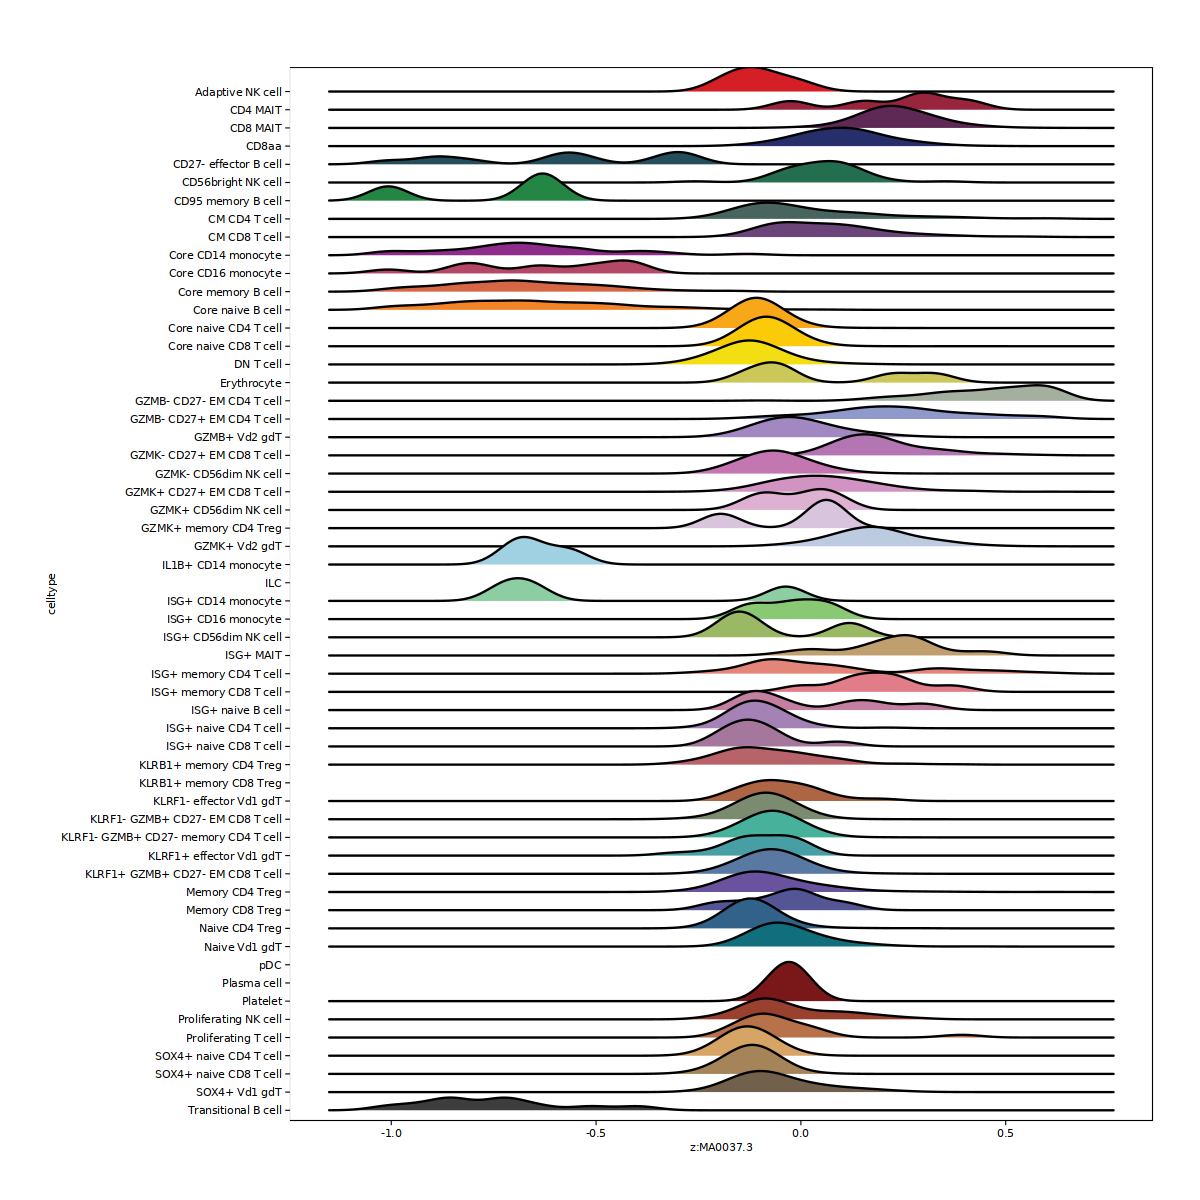

In [24]:
options(repr.plot.width = 10, repr.plot.height = 10)

plotGroups(ArchRProj = projHeme3, 
  groupBy = "celltype", 
  colorBy = "MotifMatrix", 
  name = c('z:MA0037.3'),
  imputeWeights = getImputeWeights(projHeme3)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-11fc2d576f58-Date-2024-04-09_Time-17-55-31.668103.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = MotifMatrix

Getting Matrix Values...

2024-04-09 17:55:32.009704 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-11fc2d576f58-Date-2024-04-09_Time-17-55-31.668103.log



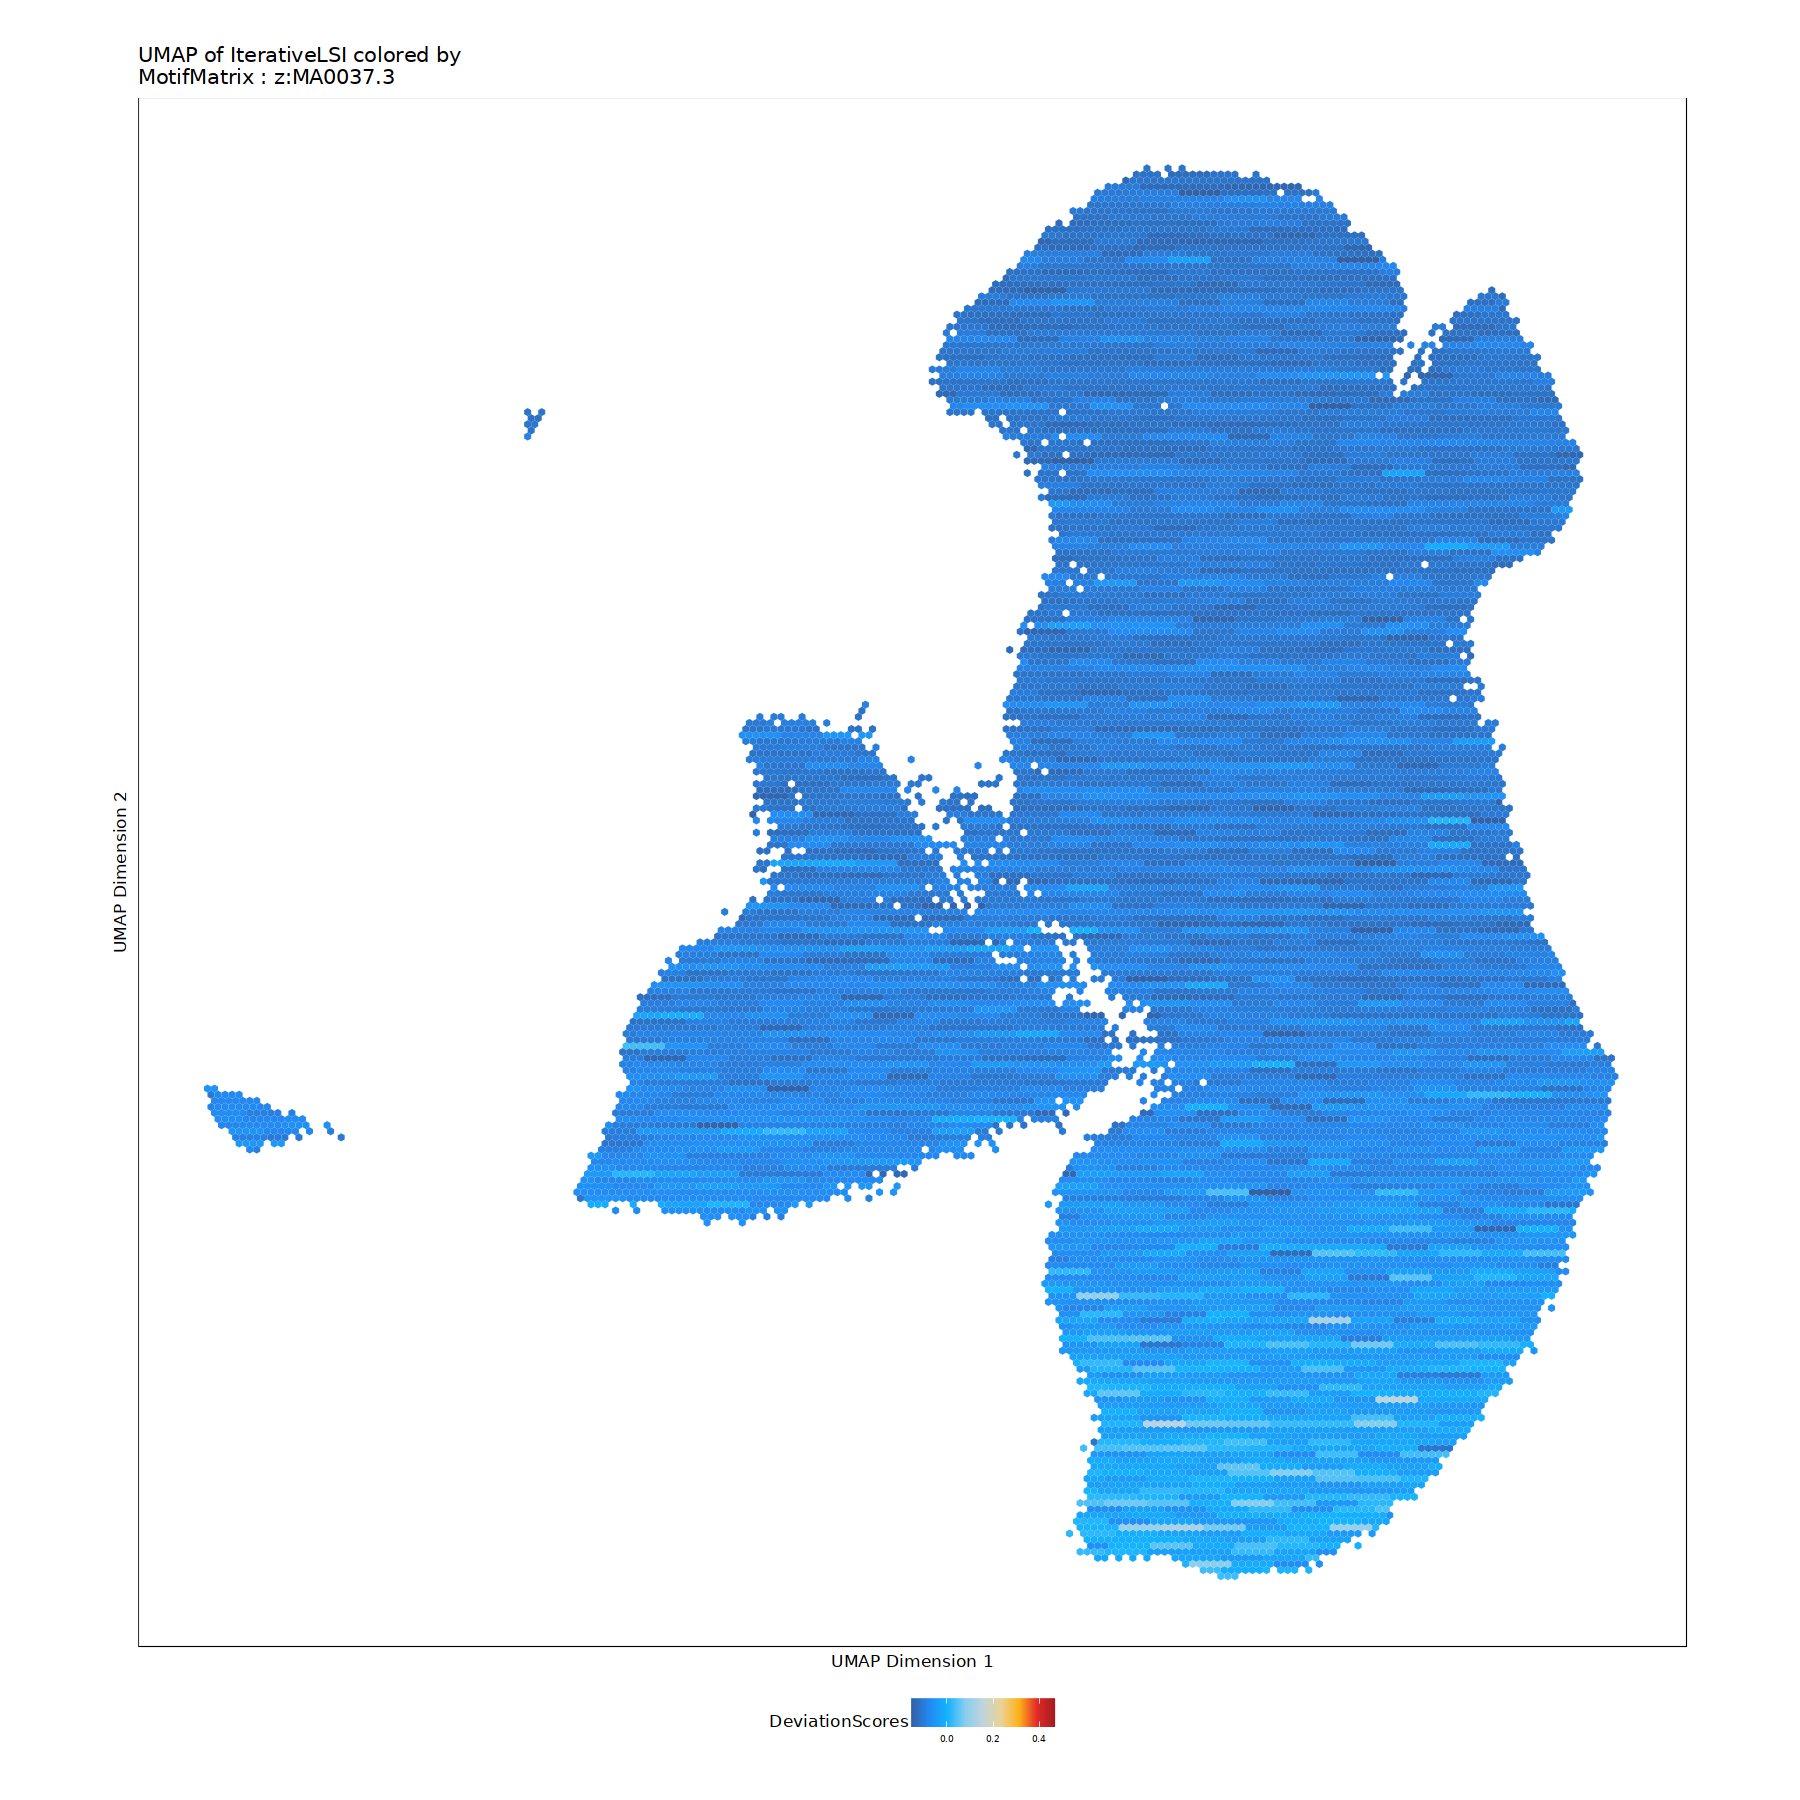

In [26]:
options(repr.plot.width = 15, repr.plot.height = 15)
plotEmbedding(ArchRProj = projHeme3, colorBy = "MotifMatrix", name = "z:MA0037.3", embedding = "UMAP")


In [32]:
saveRDS(MotifMatrix@assays@data$z, "ChromVar_motif.RDS")

In [37]:
write.csv(data.frame(projHeme3@cellColData),"ATAC_cell_meta_data.csv")

In [96]:
writeMM(MotifMatrix@assays@data$z, "sparse_matrix_ChromVar.mtx")

NULL

In [14]:
library(arrow)

Warning message:
“package ‘arrow’ was built under R version 4.3.2”

Attaching package: ‘arrow’


The following object is masked from ‘package:BiocGenerics’:

    type


The following object is masked from ‘package:magrittr’:

    is_in


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




In [37]:
df<-as.data.frame(MotifMatrix@assays@data$z)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.0 GiB”


In [38]:
df_cell_meta<-read.csv('scATAC_cell_meta_data.csv')

In [39]:
df=df[df_cell_meta$ATAC_barcodes]

In [40]:
table(df_cell_meta$ATAC_barcodes==colnames(df))


  TRUE 
301210 

In [41]:
colnames(df)<-df_cell_meta$barcodes.y

In [42]:
df$row_names <- rownames(df)  

In [43]:
write_parquet(df, "sparse_matrix_chromVar_Z.parquet")

# JASPAR2020

In [3]:
projHeme3 <- loadArchRProject(path = 'PenSen_ATAC/')

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
library('BSgenome.Hsapiens.UCSC.hg38')

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:plyr’:

    compact


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:grid’:

    pattern


The following object is masked from ‘package:base’:

    strsplit


Loading required package: BiocIO

Loading required package: rtracklayer


Attaching package: ‘rtracklayer’


The following object is masked from ‘package:BiocIO’:

    FileForFormat




In [5]:
library(JASPAR2020)
library(TFBSTools )
tair.motif=getMatrixSet(x=JASPAR2020,opts=list(collection="CORE",species="9606",matrixtype="PWM"))




Attaching package: ‘TFBSTools’


The following object is masked from ‘package:Matrix’:

    Matrix




In [6]:
projHeme3=addMotifAnnotations(projHeme3,name="JASPARMotif",motifPWMs=tair.motif,force=T)

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-11fc4301a155-Date-2024-04-09_Time-15-39-48.138082.log
If there is an issue, please report to github with logFile!

peakAnnotation name already exists! Overriding.

2024-04-09 15:39:48.420577 : Gettting Motif Set, Species : , 0.001 mins elapsed.

2024-04-09 15:39:48.936234 : Finding Motif Positions with motifmatchr!, 0.01 mins elapsed.

2024-04-09 15:42:19.182259 : All Motifs Overlap at least 1 peak!, 2.514 mins elapsed.

2024-04-09 15:42:19.184571 : Creating Motif Overlap Matrix, 2.514 mins elapsed.

2024-04-09 15:42:22.477334 : Finished Getting Motif Info!, 2.569 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-11fc4301a155-Date-2024-04-09_Time-15-39-48.138082.log



In [7]:
projHeme3 <- addBgdPeaks(projHeme3,force=T)

Identifying Background Peaks!



In [15]:
getPeakAnnotation(ArchRProj = projHeme3)


$Name
[1] "Motif"

$motifs
PWMatrixList of length 633
names(633): MA0030.1 MA0031.1 MA0051.1 MA0057.1 ... MA0748.2 MA0528.2 MA0609.2

$Positions
[1] "/home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC/Annotations/Motif-Positions-In-Peaks.rds"

$Matches
[1] "/home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC/Annotations/Motif-Matches-In-Peaks.rds"


In [18]:
pfmList <- getMatrixByID(JASPAR2020, ID=c("MA0139.1", "MA1102.1"))

In [17]:
projHeme3 <- addDeviationsMatrix(
  ArchRProj = projHeme3, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-11fc42669828-Date-2024-04-09_Time-15-48-52.793679.log
If there is an issue, please report to github with logFile!



NULL


'as(<lgCMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "dMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").

2024-04-09 15:48:57.391063 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2024-04-09 17:22:41.136906 : Completed Computing Deviations!, 93.806 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-11fc42669828-Date-2024-04-09_Time-15-48-52.793679.log



In [20]:
projHeme3 <- addImputeWeights(projHeme3)


ArchR logging to : ArchRLogs/ArchR-addImputeWeights-11fc73409ef-Date-2024-04-09_Time-17-31-30.535121.log
If there is an issue, please report to github with logFile!

2024-04-09 17:31:30.573113 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [21]:
saveArchRProject(ArchRProj = projHeme3, outputDirectory = "PenSen_ATAC_Jasper2020", load = TRUE)

Copying ArchRProject to new outputDirectory : /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC_Jasper2020

Copying Arrow Files...

Copying Arrow Files (1 of 16)

Copying Arrow Files (2 of 16)

Copying Arrow Files (3 of 16)

Copying Arrow Files (4 of 16)

Copying Arrow Files (5 of 16)

Copying Arrow Files (6 of 16)

Copying Arrow Files (7 of 16)

Copying Arrow Files (8 of 16)

Copying Arrow Files (9 of 16)

Copying Arrow Files (10 of 16)

Copying Arrow Files (11 of 16)

Copying Arrow Files (12 of 16)

Copying Arrow Files (13 of 16)

Copying Arrow Files (14 of 16)

Copying Arrow Files (15 of 16)

Copying Arrow Files (16 of 16)

Getting ImputeWeights

Dropping ImputeWeights...

Copying Other Files...

Copying Other Files (1 of 7): Annotations

Copying Other Files (2 of 7): Background-Peaks.rds

Copying Other Files (3 of 7): Embeddings

Copying Other Files (4 of 7): GroupCoverages

Copying Other Files (5 of 7): IterativeLSI

Copying Other Files (6 of 7): PeakCal

class: ArchRProject 
outputDirectory: /home/jupyter/BRI_Analysis/scRNA/Analysis-Cross-Sectional/TEAseq/PenSen_ATAC_Jasper2020 
samples(16): GSM6611374_B076-P1_PB00127-02
  GSM6611366_B076-P1_PB00353-03 ... GSM6611363_B065-P1_PB00593-04
  GSM6611372_B069-P1_PB00172-02
sampleColData names(1): ArrowFiles
cellColData names(17): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 301210
medianTSS(1): 25.372
medianFrags(1): 6894

In [28]:
MotifMatrix<-getMatrixFromProject(
  ArchRProj = projHeme3,
  useMatrix = "MotifMatrix",
  useSeqnames = NULL,
  verbose = TRUE,
  binarize = FALSE,
  threads = getArchRThreads(),
  logFile = createLogFile("getMatrixFromProject")
)


ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-11fc723e24b6-Date-2024-04-09_Time-17-56-20.03966.log
If there is an issue, please report to github with logFile!

2024-04-09 17:56:47.868767 : Organizing colData, 0.464 mins elapsed.

2024-04-09 17:56:48.776974 : Organizing rowData, 0.479 mins elapsed.

2024-04-09 17:56:48.78193 : Organizing rowRanges, 0.479 mins elapsed.

2024-04-09 17:56:48.788252 : Organizing Assays (1 of 2), 0.479 mins elapsed.

2024-04-09 17:57:08.993819 : Organizing Assays (2 of 2), 0.816 mins elapsed.

2024-04-09 17:57:24.990432 : Constructing SummarizedExperiment, 1.083 mins elapsed.

2024-04-09 17:57:26.586197 : Finished Matrix Creation, 1.109 mins elapsed.



In [29]:
df<-as.data.frame(MotifMatrix@assays@data$z)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


In [30]:
df_cell_meta<-read.csv('scATAC_cell_meta_data.csv')

In [31]:
df=df[df_cell_meta$ATAC_barcodes]

In [32]:
table(df_cell_meta$ATAC_barcodes==colnames(df))


  TRUE 
301210 

In [33]:
colnames(df)<-df_cell_meta$barcodes.y

In [34]:
df$row_names <- rownames(df)  

In [36]:
library(arrow)

Warning message:
“package ‘arrow’ was built under R version 4.3.2”

Attaching package: ‘arrow’


The following object is masked from ‘package:Biostrings’:

    type


The following object is masked from ‘package:BiocGenerics’:

    type


The following object is masked from ‘package:magrittr’:

    is_in


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




In [37]:
write_parquet(df, "sparse_matrix_chromVar_Z.parquet")